In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

#rgb scale is 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


'truck'

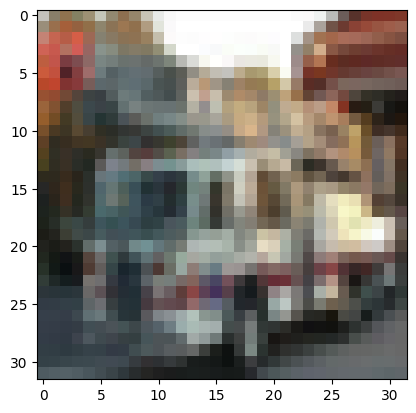

In [ ]:
plt.imshow(x_train[900])
class_names[y_train[900][0]]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3))) # filter 3 x 3 is apllied for 32 times and input shape is 32 x 32 amd 3 is a chanel which is whether rgb
model.add(layers.MaxPooling2D((2, 2))) #result will be in 2 x 2 matrix
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # always shpuld be ended in convolutional layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))#  for calculating the weights the relu is used
model.add(layers.Dense(10)) # if activation function is not used the default will be there

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0989 - loss: 2.5507 - val_accuracy: 0.1054 - val_loss: 2.3026
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0983 - loss: 2.3026 - val_accuracy: 0.1054 - val_loss: 2.3026
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accuracy: 0.1054 - val_loss: 2.3026
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1002 - loss: 2.3026 - val_accuracy: 0.1054 - val_loss: 2.3026
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1008 - loss: 2.3026 - val_accuracy: 0.1054 - val_loss: 2.3026


Text(0.5, 0, 'epoch')

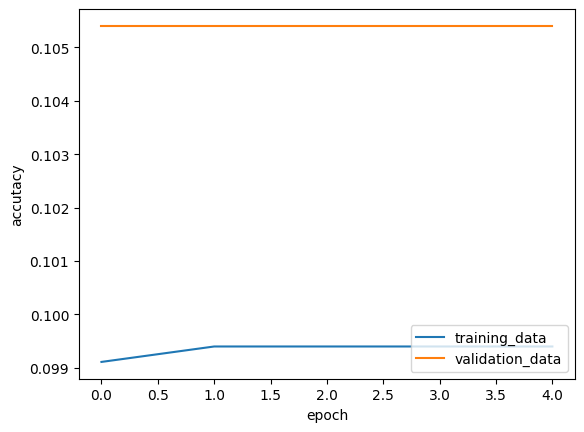

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_data', 'validation_data'], loc = 'lower right')
plt.ylabel('accutacy')
plt.xlabel('epoch')

In [ ]:
tf.keras.models.save_model(model, 'model.hdf5')

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
import numpy as np

In [ ]:
y_pred1 = np.argmax(y_pred, axis = 1)
class_names[y_pred1[2004]]

'dog'

In [ ]:
y_test[2004]

array([7], dtype=uint8)

TypeError: Invalid shape (1,) for image data

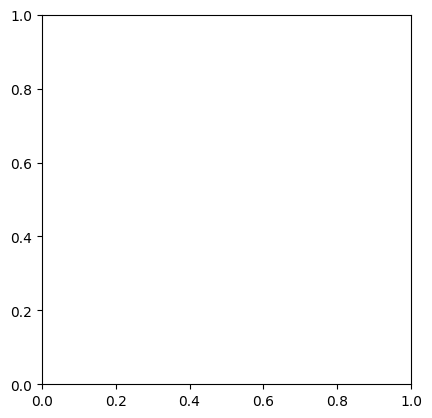

In [ ]:
# plt.imshow(y_test[2004])

Text(0.5, 1.0, 'y_test : [8], y_pred : [-0.5042663  -0.36443338 -0.3156047  -0.378455   -0.889714   -0.12599957\n -0.43557903 -0.34120426 -0.50231093 -0.40585166]')

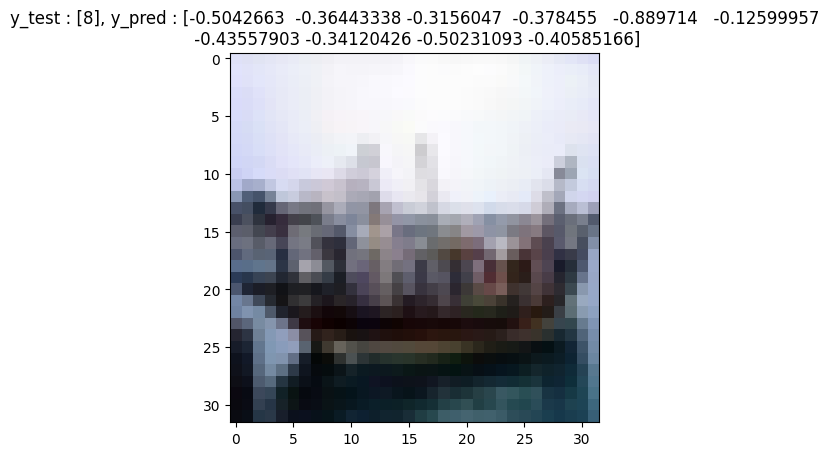

In [ ]:
plt.imshow(x_test[18], cmap = "gray")
plt.title(f"y_test : {y_test[18]}, y_pred : {y_pred[18]}")

In [ ]:
y_pred1

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
y_pred[8888]

array([-0.37420005, -0.318806  , -0.24458276, -0.3595353 , -0.73557585,
       -0.15456617, -0.3483261 , -0.31314328, -0.43472922, -0.35722905],
      dtype=float32)

In [ ]:
# plt.imshow(x_test[])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred1, y_test)

0.0996